<div style="font-size: 18pt;">Determine why people are leaving this company?</div><br/>
<div style="font-size: 18pt;">Determine what is the optimal threshold?</div><br/><br/>

In [189]:
#load necessary packages
import os
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [190]:
#check current folder
os.getcwd()

'/home/fuzayl/Desktop/applied-machine-learning/lesson-3'

In [191]:
#load and inspect KPI data
hr = pd.read_csv("data/HR_comma_sep.csv")
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [192]:
#understand the data format
hr.iloc[:,0:4].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337
std,0.248631,0.171169,1.232592,49.943099
min,0.090000,0.360000,2.000000,96.000000
25%,0.440000,0.560000,3.000000,156.000000
50%,0.640000,0.720000,4.000000,200.000000
75%,0.820000,0.870000,5.000000,245.000000
max,1.000000,1.000000,7.000000,310.000000


In [193]:
hr.iloc[:,4:8].describe()

,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.498233,0.144610,0.238083,0.021268
std,1.460136,0.351719,0.425924,0.144281
min,2.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,10.000000,1.000000,1.000000,1.000000


In [194]:
hr.iloc[:,8:10].describe()

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [195]:
#examine columns sales and salary
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [196]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [149]:
#One cannot use strings in regression models, so typically do one-hot coding

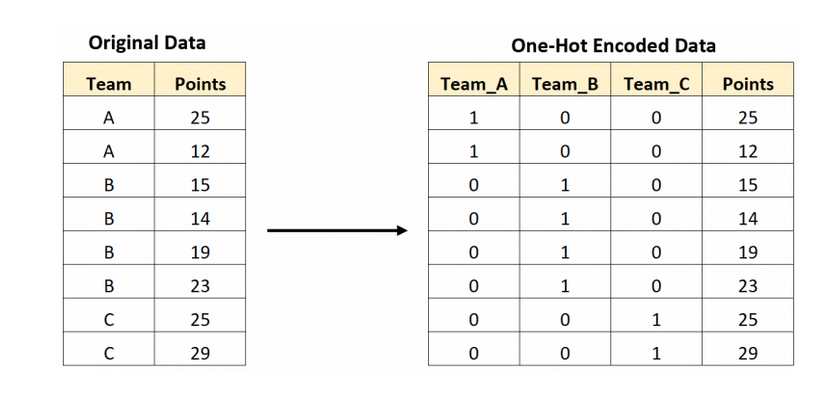

In [197]:
#do one-hot coding
job_type = pd.get_dummies(hr.sales, prefix='job')
salary_level = pd.get_dummies(hr.salary, prefix='salary')
job_type


,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [198]:
#create outcome vector and features dataframe
left = hr[['left']]
left = left['left'].ravel()
X = hr.drop(['left'], axis=1)

In [199]:
#merge with X
job_type.reset_index(inplace=True)
salary_level.reset_index(inplace=True)
X.reset_index(inplace=True)
X = pd.concat([X, job_type, salary_level], axis=1)
X.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'index', 'job_IT',
       'job_RandD', 'job_accounting', 'job_hr', 'job_management',
       'job_marketing', 'job_product_mng', 'job_sales', 'job_support',
       'job_technical', 'index', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [200]:
#drop columns we do not need
X = X.drop(['index','sales', 'salary', 'job_marketing', 'salary_medium'], axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,job_IT,job_RandD,job_accounting,job_hr,job_management,job_product_mng,job_sales,job_support,job_technical,salary_high,salary_low
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,0,1


<div style="font-size: 14pt;">Problem 1</div>
Answer question Q1: Who and why is leaving the company?

In [201]:
#check for multicollinearity
#use the graphic parameters below to get a well-sized heatmap
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 22})

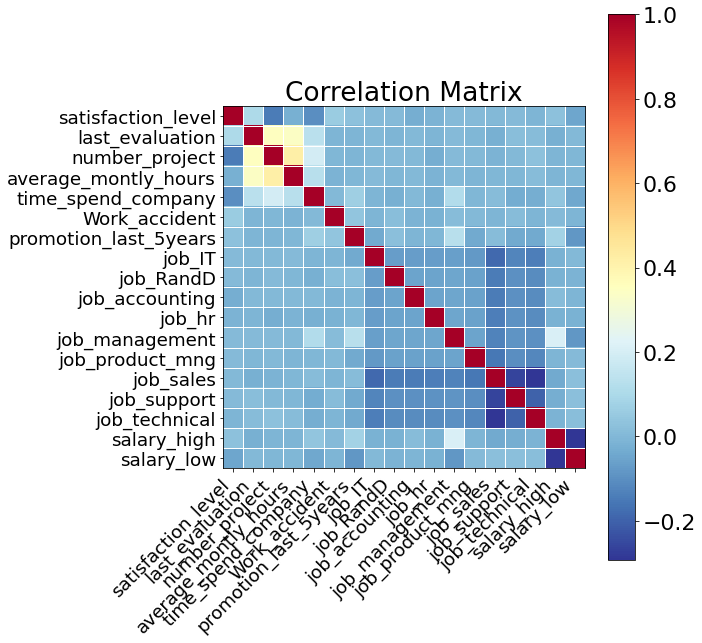

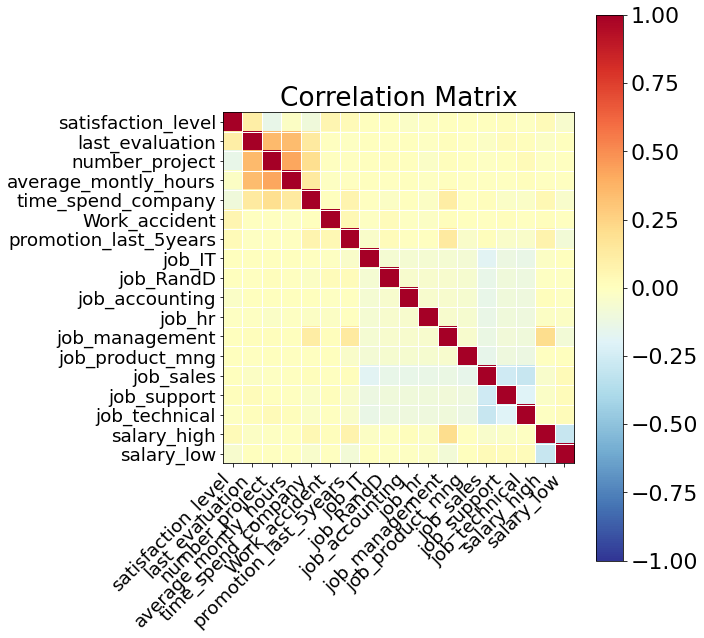

In [202]:
##add code here
corr = X.corr()
smg.plot_corr(corr, xnames=corr.columns.values)
smg.plot_corr(corr, xnames=corr.columns.values, normcolor=True)
plt.show()

In [ ]:
#estimate economist style model using statsmodels library sm
#estimate the model using robust standard errors
#answer the Q1 question

In [203]:
#estimate the model using robust standard errors

X = sm.add_constant(X)
model_sm = sm.Logit(left, X)
res_sm = model_sm.fit(method='newton', cov_type="hc0")
res_sm.summary()

/home/fuzayl/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.2195
Time:                        18:41:17   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
Covariance Type:                  hc0   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0752      0.179     -0.419      0.675      -0.427       0.276
satisfaction_level       -4.1357      0.104    -39.651      0.000      -4.340      -3.931
last_evaluation           0.7309      0.133      5.489      0.000       0.470       0.992
number_project           -0.3151      0.021    -15.060      0.000      -0.356      -0.274
average_montly_hours      0.0045      0.000      9.952      0.000       0.004       0.005
time_spend_company        0.2678      0.017     15.988      0.000       0.235       0.301
Work_accident            -1.5298      0.094    -16.346      0.000      -1.713      -1.346
promotion_last_5years    -1.4301      0.273     -5.234      0.000      -1.966      -0.895
job_IT                   -0.1686      0.123     -1.373      0.170      -0.409       0.072
job_RandD                -0.5703      0.150     -3.796      0.000      -0.865      -0.276
job_accounting            0.0121      0.135      0.090      0.928      -0.252       0.276
job_hr                    0.2445      0.132      1.848      0.065      -0.015       0.504
job_management           -0.4363      0.161     -2.704      0.007      -0.753      -0.120
job_product_mng          -0.1412      0.134     -1.050      0.294      -0.405       0.122
job_sales                -0.0267      0.104     -0.256      0.798      -0.231       0.178
job_support               0.0621      0.111      0.562      0.574      -0.155       0.279
job_technical             0.0822      0.109      0.756      0.450      -0.131       0.295
salary_high              -1.4132      0.140    -10.098      0.000      -1.688      -1.139
salary_low                0.5308      0.046     11.465      0.000       0.440       0.622
=========================================================================================
"""

<div style="font-size: 14pt;">Problem 2</div>
Answer question Q2: What is the optimal threshold?

In [204]:
X = X.drop(['const', 'job_IT', 'job_accounting', 'job_hr',
             'job_product_mng', 'job_sales', 'job_support', 'job_technical'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(
    X, left, test_size=0.2, random_state=111, stratify=left)

In [205]:
y_train.mean(), y_test.mean()

#As majority of employees have not left the company(76.2%), our base model always predicts that the employee will
#stay at company.

(0.2381031752646054, 0.238)

In [206]:
model = LogisticRegression(random_state=100, solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [207]:
#make predictions and calculate confusion matrix, compare to base model
plt.rcParams["figure.figsize"] = (5,5)

0.7916666666666666

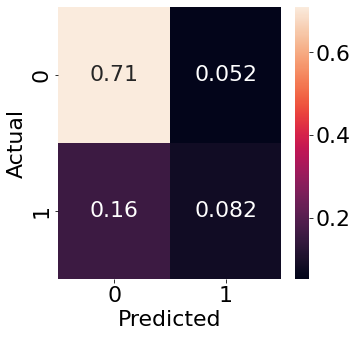

In [208]:
y_pred=model.predict(x_test)
cfm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
cfm = cfm / cfm.sum().sum()
sns.heatmap(cfm, annot=True)
accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
accuracy

# The accuracy of our model is 79% while the accuracy of base model is 76.2%

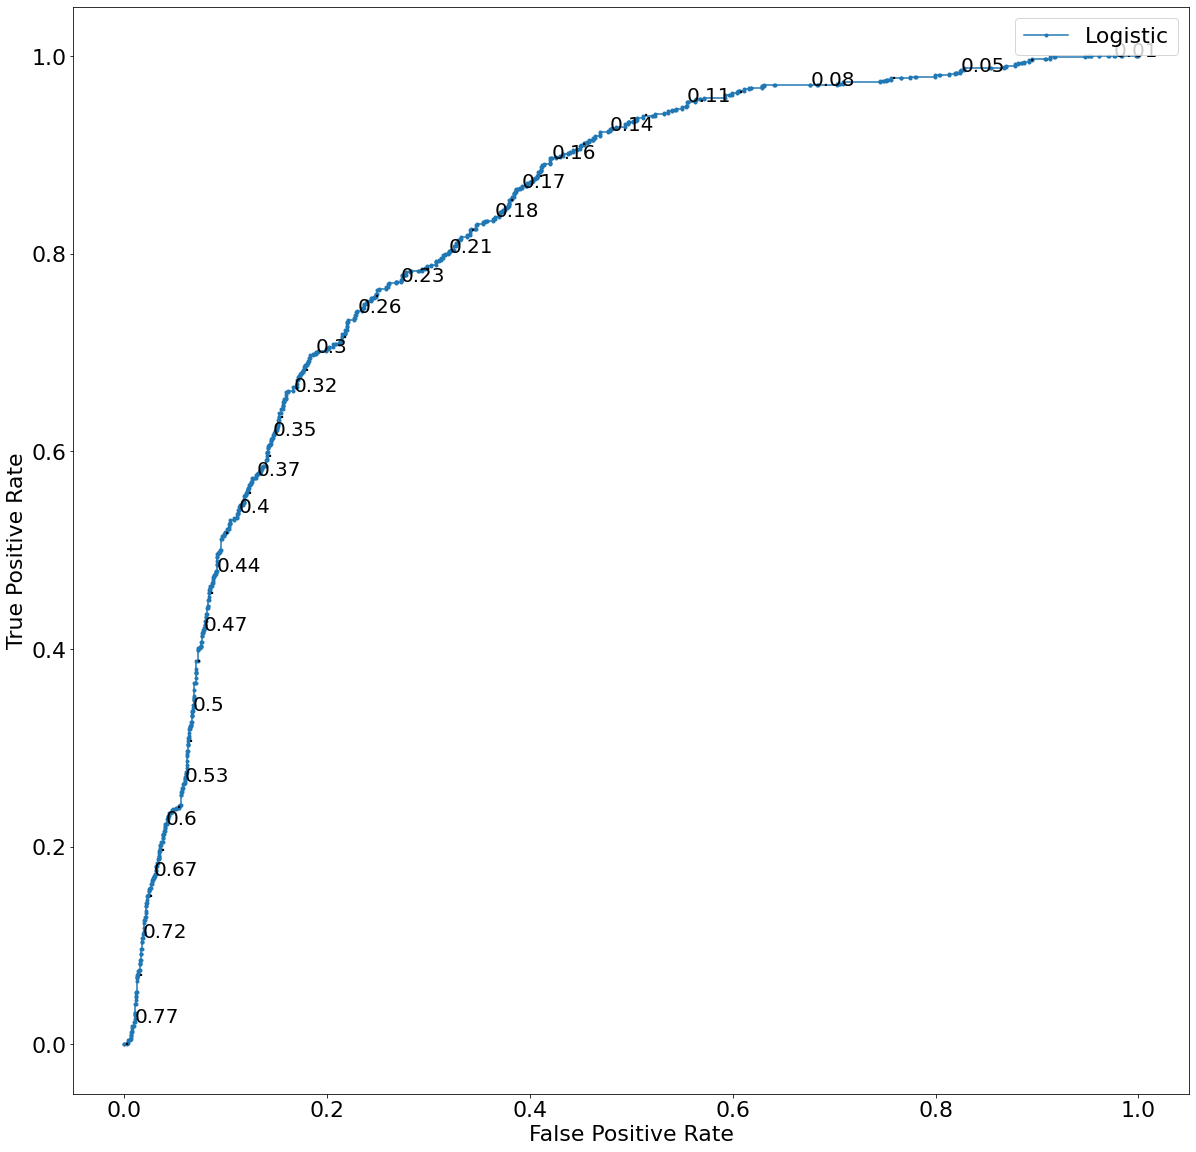

In [209]:
#improve the model by using ROC curve to calculate threshold
#get probabilities for y_pred
plt.rcParams["figure.figsize"] = (20, 20)
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]
y_pred.shape, y_prob.shape
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
str_thresholds = [str(round(x,2)) for x in thresholds]

sel = list(range(len(str_thresholds))[::2])
for ind in sel:
    str_thresholds[ind] = '.'

plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

counter = 0
for i in range(len(thresholds)):
    if counter % 19 == 0:
        plt.text(fpr[i], tpr[i], str_thresholds[i], fontsize=20)
    
    counter += 1

plt.show()

In [210]:
def calculate_confusion_matrix(y_test, y_prob, threshold):
    y_pred_t = 1*(y_prob >= threshold)
    cfm = pd.crosstab(y_test, y_pred_t, rownames=['Actual'], colnames=['Predicted'])
    cfm = cfm / cfm.sum().sum()
    accuracy = cfm.iloc[0,0] + cfm.iloc[1,1]
    print("`Accuracy =  {:6.4f}".format(accuracy))
    return cfm, accuracy

In [211]:
calculate_confusion_matrix(y_test, y_prob, 0.4365)

`Accuracy =  0.8087


(Predicted         0         1
 Actual                       
 0          0.692333  0.069667
 1          0.121667  0.116333,
 0.8086666666666666)